PRÁTICA GUIADA: Clustering

## 1. Preparando os dados

# <center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD'>


### Introdução

**Objetivo:** Realizar uma análise de clustering a partir do algoritmo _k-means_ utilizando o antigo e já amplamente conhecido conjunto de dados do _iris_

Primeiro, vamos importar as bibliotecas necessárias:

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Usaremos **Scikit-Learn** para nossa análise

In [0]:
#Importamos o conjunto de dados IRIS
iris_dataset = datasets.load_iris()

Dado que este conjunto de dados já está "formatado" do modo que `sklearn` necessita, é possível utilizar os métodos que este objeto tem para ver as informações:

In [0]:
iris_dataset.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [0]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
y = iris_dataset.target

In [0]:
e

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

===================================================================================================================
**Notar** que _target_ é a variável categórica que nos indica a que tipo de espécie pertence:

* 0 ---> 'setosa' 
* 1 ---> 'versicolor'
* 2 ---> 'virginica' 


O algoritmo K-Means assume valores numéricos, se a variável da categoria tivesse sido do tipo _string_, teríamos que redefinir essa variável. 

Por exemplo:

~~~
       `def name_to_numeric(x):
if x=='setosa':return 0if x=='virginica':return 1if x=='versicolor':return 2`~~~
=====================================================================================================================

Usando o Pandas, construimos um DataFrame de estilo (exemplo de forma) 


SepalLength | SepalWidth |PetalLength| PetalWidth| Name_num
---------------|------------|------------|--------------|------------
5.1|3.5|1.4|0.2|0
4.9|3.0|1.4|0.2|0
4.7|3.2|1.3|0.2|1
4.6|3.1|1.5|0.2|2
5.0|3.6|1.4|0.2|0
...|...|...|...|...

In [0]:
#Construímos as primeiras quatro colunas
df = pd.DataFrame(iris_dataset.data, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Juntamos a coluna 'name_num' com os valores da variável "target"
df['name_num']=iris_dataset.target

#Revisamos as primeiras linhas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Agora, vamos plotear os dados para ver as distribuições:

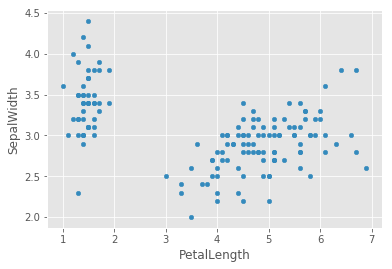

In [0]:
df.plot(kind='scatter',x='PetalLength',y='SepalWidth')

Se executamos este gráfico varias vezes usando combinações de fatores diferentes - podemos ver que independentemente dos factores que trazemos, parece que há dois grupos distintos emergentes - isto nos ajudará com a seguinte parte de nossa análise: executar a prova k-means

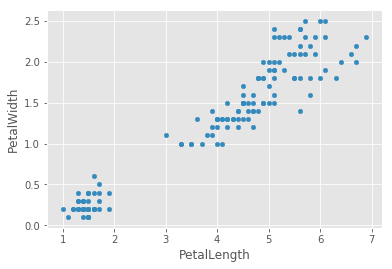

In [0]:
df.plot(kind='scatter',x='PetalLength',y='PetalWidth')

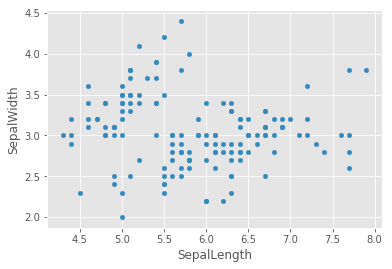

In [0]:
df.plot(kind='scatter',x='SepalLength',y='SepalWidth')

## 2. Implementando o clustering

#### Antes de realizar a prova de k-means, ainda há algumas modificações a fazer:

Convertemos nossos dados em um Numpy Array:

In [0]:
dn = df.as_matrix(columns=None)

Já estamos prontos! (Poderíamos ter obtido a matriz de outra forma?)
Resposta: Sim... `dn2 = np.array(df)`

Agora que formatamos nossos dados e compreendemos suas estruturas, finalmente podemos seguir e agrupar.

Vamos estabelecer __k=2__ dado o comportamento que vimos acima em nossos gráficos.

In [0]:
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como sempre, costuma ser uma boa prática fijar la semilla
kmeans.fit(dn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Podemos utilizar as funções integradas de Scikit para determinar os locais dos centróides e suas tags:

In [0]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## 3. Visualizando os clusters

Text(0,0.5,'PetalWidth')

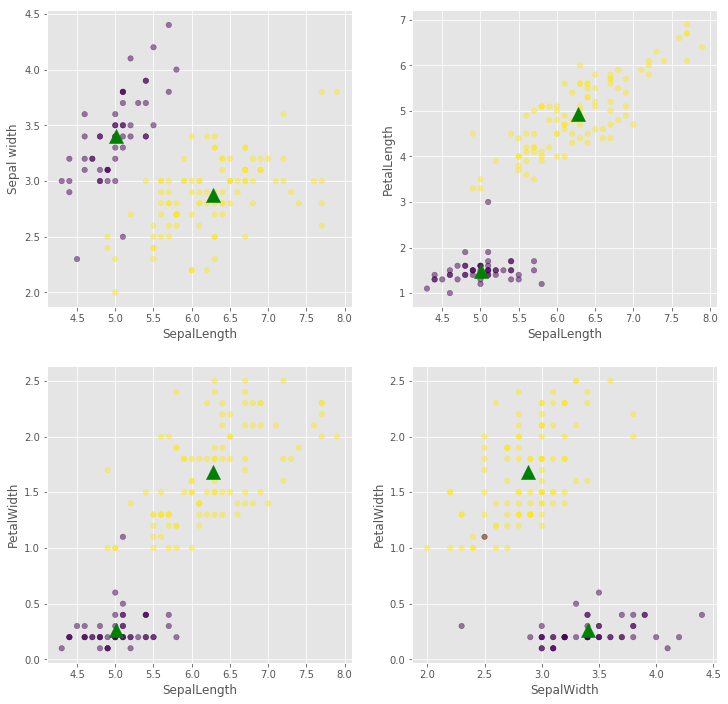

In [0]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#pontos
ax1.scatter(dn[:, 0], dn[:, 1], c=labels,alpha=0.5,s=30)
#centróides
ax1.scatter(centroids[0][0],centroids[0][1], c='g',s=200,marker=u'^')
ax1.scatter(centroids[1][0],centroids[1][1], c='g',s=200,marker=u'^')

ax1.set_xlabel('SepalLength')
ax1.set_ylabel('Sepal width')

ax2=plt.subplot(222)
#pontos
ax2.scatter(dn[:, 0], dn[:, 2], c=labels,alpha=0.5,s=30)
#centróides
ax2.scatter(centroids[0][0],centroids[0][2], c='g',s=200,marker=u'^')
ax2.scatter(centroids[1][0],centroids[1][2], c='g',s=200,marker=u'^')

ax2.set_xlabel('SepalLength')
ax2.set_ylabel('PetalLength')

ax3=plt.subplot(223)
#pontos
ax3.scatter(dn[:, 0], dn[:, 3], c=labels,alpha=0.5,s=30)
#centróides
ax3.scatter(centroids[0][0],centroids[0][3], c='g',s=200,marker=u'^')
ax3.scatter(centroids[1][0],centroids[1][3], c='g',s=200,marker=u'^')

ax3.set_xlabel('SepalLength')
ax3.set_ylabel('PetalWidth')

ax4=plt.subplot(224)
#pontos
ax4.scatter(dn[:, 1], dn[:, 3], c=labels,alpha=0.5,s=30)
#centróides
ax4.scatter(centroids[0][1],centroids[0][3], c='g',s=200,marker=u'^')
ax4.scatter(centroids[1][1],centroids[1][3], c='g',s=200,marker=u'^')

ax4.set_xlabel('SepalWidth')
ax4.set_ylabel('PetalWidth')

## 4. Avaliando os clusters

Agora, usemos algumas das medidas que vimos para avaliar os clusters que construímos.

In [0]:
import sklearn.metrics as sm

In [0]:
predY = np.choose(labels, [0, 1, 2]).astype(np.int64)

### 4.1 Validação externa

Neste caso (pouco habitual), temos uma variável externa (a espécie da flor) que "coincide" com os clusters - conceitualmente falando. Habitualmente, podemos encontrar alguma variável que podemos considerar como altamente correlacionada com nossos clusters e que podemos usar como fonte de validação externa do nosso clustering.

#### 4.1.1 Accuracy

In [0]:
sm.accuracy_score(y, predY)

0.66000000000000003

#### 4.1.2 Classification Report

In [0]:
print(sm.classification_report(y, predY))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        50
          1       0.49      0.98      0.66        50
          2       0.00      0.00      0.00        50

avg / total       0.49      0.66      0.55       150



/home/digitalhouse/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix

In [0]:
print(sm.confusion_matrix(y, predY))

[[50  0  0]
 [ 1 49  0]
 [ 0 50  0]]


### 4.2 Validação interna

#### 4.2.1 Silhouette Score 

In [0]:
sm.silhouette_score(dn, predY, metric='euclidean')

0.67980279788123221

#### 4.2.2 Calinsky-Harabaz Index

In [0]:
sm.calinski_harabaz_score(dn, predY)  

497.15735363859966

### BONUS

Avaliem como funcionam diferentes quantidades de clusters utilizando algumas das ferramentas que vimos. Qual acreditam que seria o k ótimo para o clustering do conjunto de dados do iris?

In [0]:
evaluation = []
for k in range(2,9):
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como sempre, costuma ser uma boa prática fijar la semilla
    kmeans.fit(dn)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    predY = np.choose(labels, pd.Series(range(0,k+1)).astype(np.int64))
    accuracy = sm.accuracy_score(y, predY)
    silhouette = sm.silhouette_score(dn, predY, metric='euclidean')
calinsky = sm.calinski_harabaz_score(dn, predY)    evaluation = [(k, accuracy, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.66000000000000003, 0.67980279788123221, 497.15735363859966)]
K=  [(3, 0.32666666666666666, 0.58169370709909041, 583.81960935630764)]
K=  [(4, 0.08666666666666667, 0.54253075980415755, 519.07945340757203)]
K=  [(5, 0.7466666666666667, 0.51343494088045205, 525.13774484086741)]
K=  [(6, 0.18666666666666668, 0.39258783858333329, 497.0351122585588)]
K=  [(7, 0.14666666666666667, 0.39349777416947923, 501.85819620640348)]
K=  [(8, 0.41333333333333333, 0.38820614093054362, 486.02978766836219)]
